In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

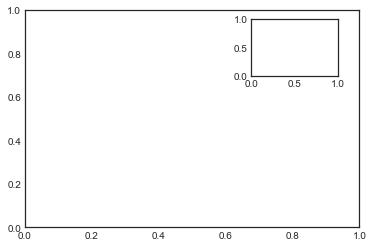

In [7]:
ax1 = plt.axes() #обычные оси координат
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

Аналог данной команды в объектно-ориентированном интерфейсе - fig.add_axes()

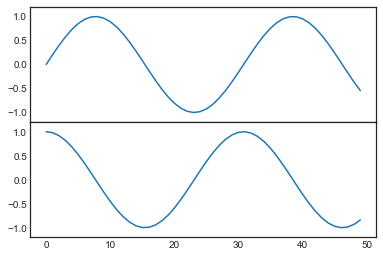

In [10]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))
x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x))

plt.subplot простые сетки субграфиков:

функция plt.subplot, создающая отдельный субграфик внутри сетки. Эта команда принимает на входе три целочисленных аргумента — количество строк, количество столбцов и индекс создаваемого по такой схеме графика, отсчет которого начинается в верхнем левом углу и заканчивается в правом нижнем

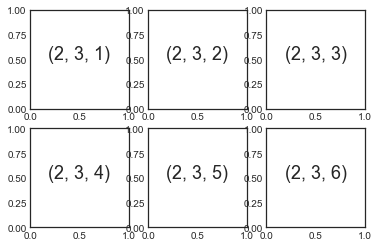

In [17]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

для настройки полей можно использовать команду plt.subplots_adjust

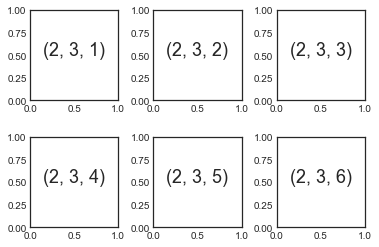

In [28]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
            fontsize=18, ha='center')

функция plt.subplots: создание всей сетки за один раз

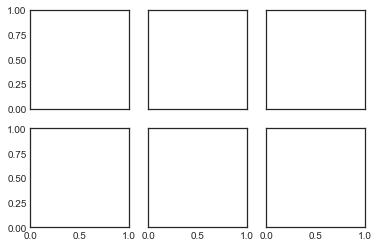

In [30]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row') #в одном столбыце (col) у субграфиков
                                                         #одинаковая ось х, в одной строке у субграфиков общая ось у

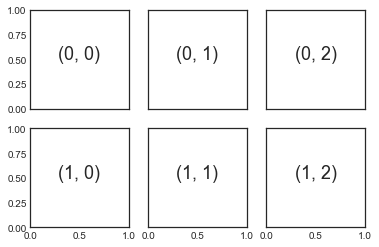

In [31]:
#системы координат располагаются в двумерном массиве,
#индексируемом по [строка, столбец]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

Функция plt.GridSpec: более сложные конфигурации:

In [32]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

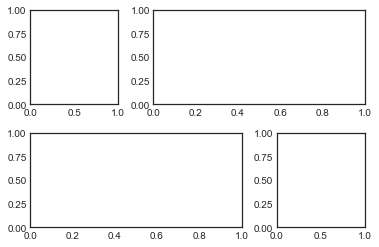

In [33]:
#затем можно задать местоположение и размеры графиков с помощью
#обычного синтаксиса срезов языка python
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2])

In [35]:
#создаем нормально распределенные данные 
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

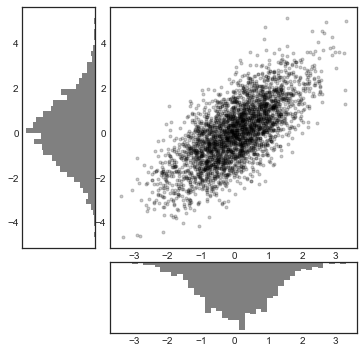

In [44]:
#задаем системы координат с помощью функции GridSpec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

#Распределяем точки по основной системе координат
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

#Рисуем гостограммы на дополнительных системах координат
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()